In [79]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import SGDRegressor
from collections import Counter
from scipy.optimize import minimize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.linalg import eigh as sp_eigh
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel, BayesianNetwork
import networkx as nx

In [43]:
pip install pgmpy

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/c7/e6/e451590c2341b3d59d7b613e1af80daefd9e2873f7c9ad3d498ad84e7f44/pgmpy-0.1.26-py3-none-any.whl.metadata
  Using cached pgmpy-0.1.26-py3-none-any.whl.metadata (9.1 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Obtaining dependency information for opt-einsum from https://files.pythonhosted.org/packages/23/cd/066e86230ae37ed0be70aae89aabf03ca8d9f39c8aea0dec8029455b5540/opt_einsum-3.4.0-py3-none-any.whl.metadata
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\Users\\yaneg\\anaconda3\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/c7/e6/e451590c2341b3d59d7b613e1af80daefd9e2873f7c9ad3d498ad84e7f44/pgmpy-0.1.26-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opt-einsum from https://files.pythonhosted.org/packages/23/cd/066e86230ae37ed0be70aae89aabf03ca8d9f39c8aea0dec8029455b5540/opt_einsum-3.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for google-generativeai from https://files.pythonhosted.org/packages/e9/2f/b5c1d62e94409ed98d5425e83b8e6d3dd475b611be272f561b1a545d273a/google_generativeai

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/c7/e6/e451590c2341b3d59d7b613e1af80daefd9e2873f7c9ad3d498ad84e7f44/pgmpy-0.1.26-py3-none-any.whl.metadata
  Using cached pgmpy-0.1.26-py3-none-any.whl.metadata (9.1 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/0d/4a/e51420d46cfc90562e85af2fee912237c662ab31140ab179e49bd69401d6/torch-2.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.5.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Obtaining dependency information for opt-einsum from https://files.pythonhosted.org/packages/23/cd/066e86230ae37ed0be70aae89aabf03ca8d9f39c8aea0dec8029455b5540/opt_einsum-3.4.0-py3-none-any.whl.metadata
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl

В качестве датасета я буду использовать датасет по определению сердечных заболеваний, обазначенных, как target

In [3]:
df=pd.read_csv(r'C:\Users\yaneg\.git\py\ml\heart.csv')
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

Проведем разведочный анализ

In [45]:
np.sum(df.isna(), axis=0)

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yaneg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


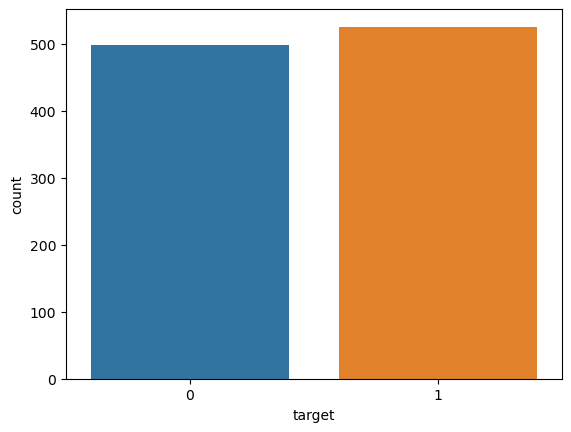

In [4]:
sns.countplot(x="target", data=df)
plt.show()

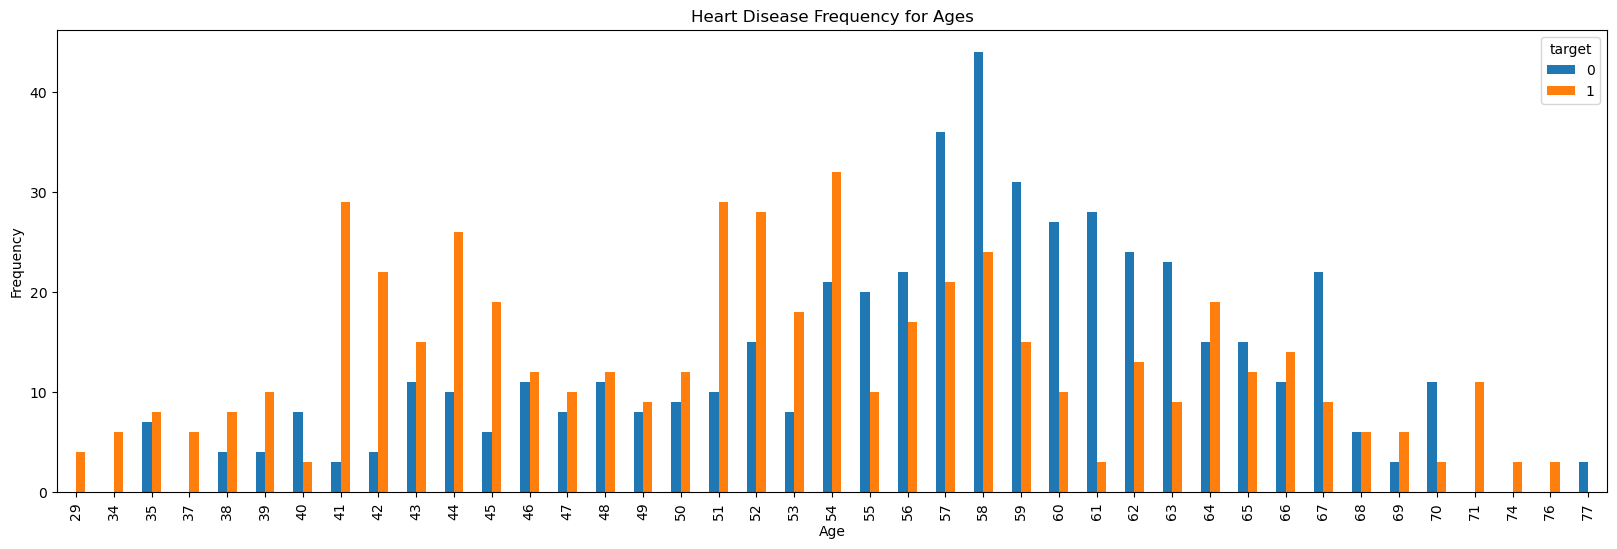

In [5]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

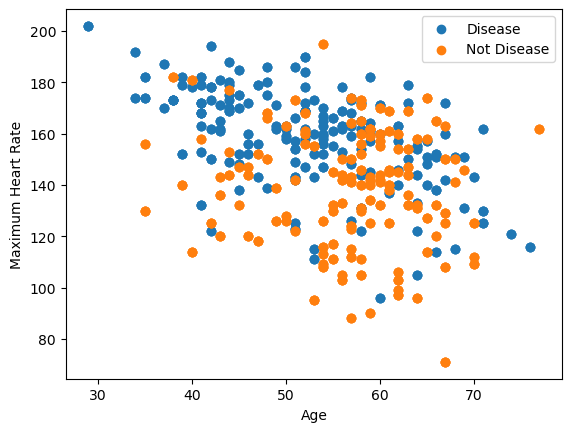

In [6]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Можно увидеть что с увеличением возраста количество заболеваний увеличивается, в то время как их отсутсвие снижается

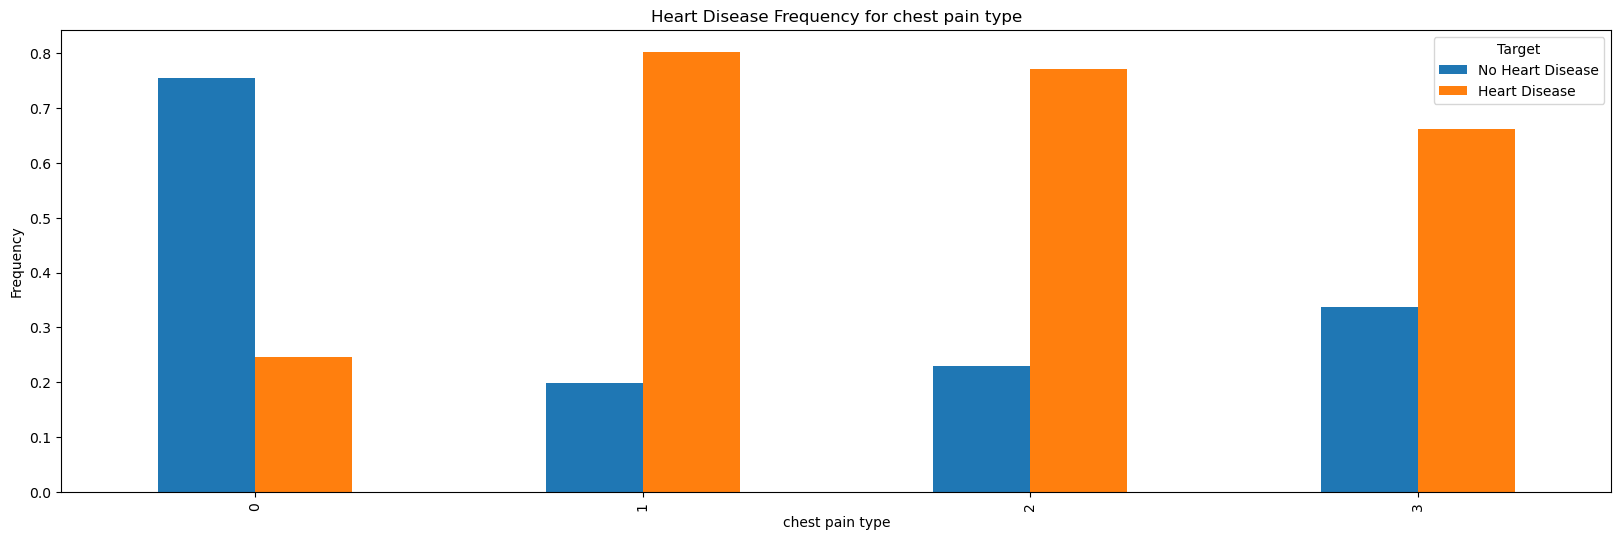

In [8]:
ct = pd.crosstab(df.cp, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for chest pain type')
plt.xlabel('chest pain type')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

В данном случае можем увидеть, что взаимосвязь носит отнюдь нелинейный характер, частота сначала увеличивается, потом начинает снижаться нобходимо будет ввести dummy

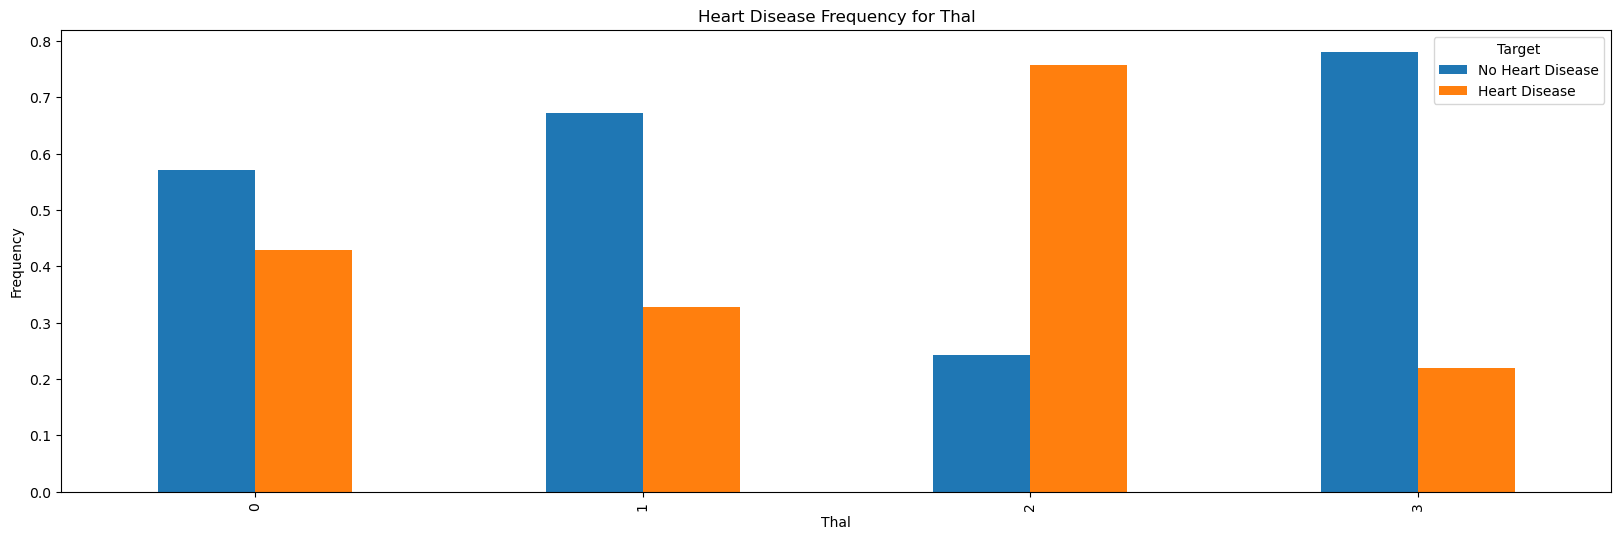

In [9]:
ct = pd.crosstab(df.thal, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Thal')
plt.xlabel('Thal')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

Результат нельзя назвать однозначным, как таковая зависимость отсутвует

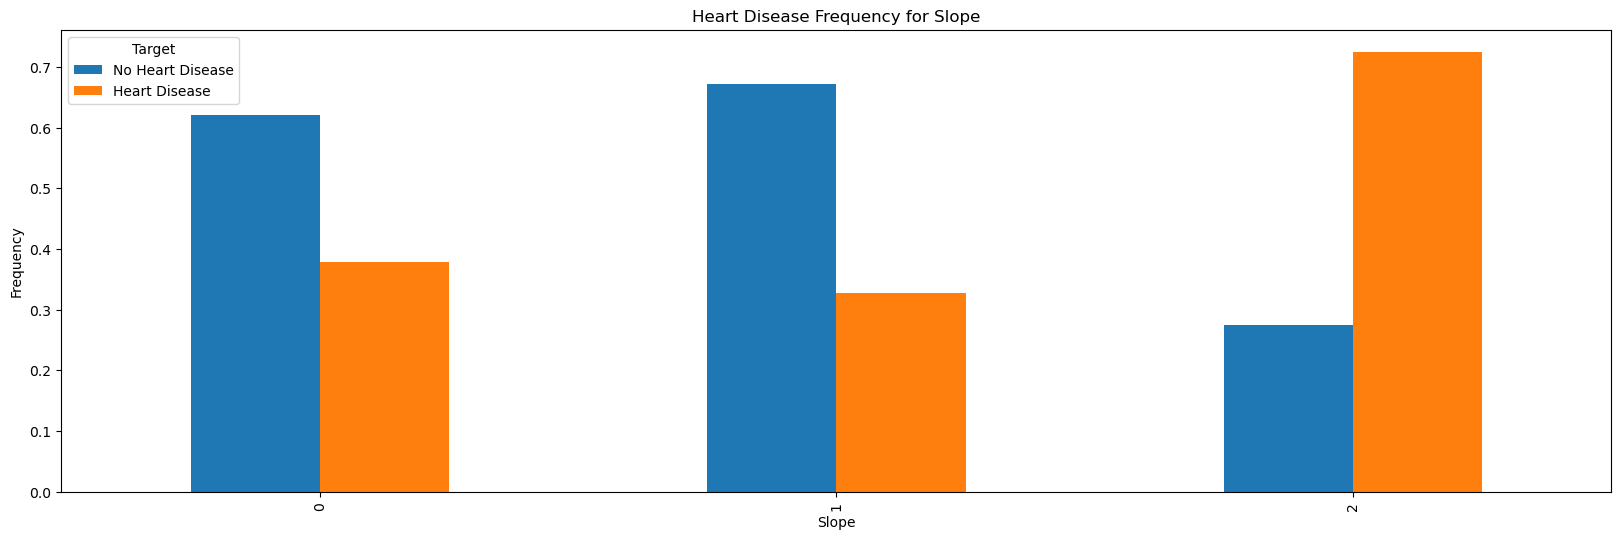

In [ ]:
ct = pd.crosstab(df.slope, df.target, normalize='index') 

# Построение столбчатой диаграммы
ct.plot(kind='bar', figsize=(20, 6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

ct = pd.crosstab(df.slope, df.target, normalize='index') 



В данном случае также нельзя увидеть однозначную связь

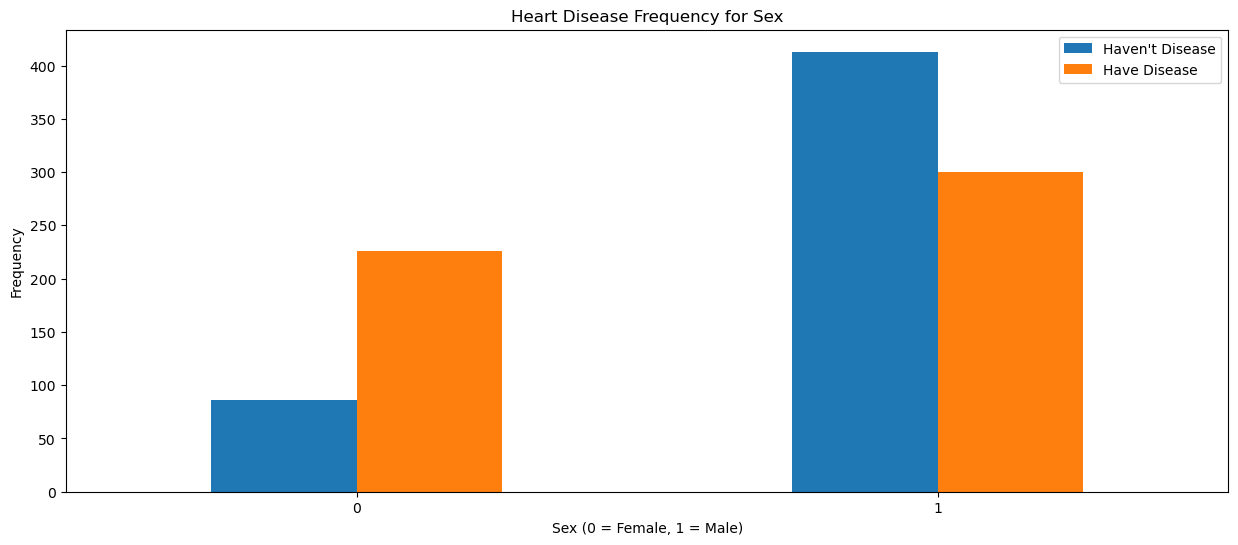

In [11]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

Можно увидеть что у женщин заболевание встречается реже

FEATURE ENGINEERING

Пропущенные данные отсутсвуют
cp,thal,slope
Данные признаки необходимо перевести в количественные, поскольку нельзя сказать, что изменение числа внутри имеют однозначную связь с целевым признакам, поэтому лучше будет перевести их в дамми  

In [12]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()
df=df.drop(columns=['cp','thal','slope'])
df

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0      52    1       125   212    0        1      168      0      1.0   2   
1      53    1       140   203    1        0      155      1      3.1   0   
2      70    1       145   174    0        1      125      1      2.6   0   
3      61    1       148   203    0        1      161      0      0.0   1   
4      62    0       138   294    1        1      106      0      1.9   3   
...   ...  ...       ...   ...  ...      ...      ...    ...      ...  ..   
1020   59    1       140   221    0        1      164      1      0.0   0   
1021   60    1       125   258    0        0      141      1      2.8   1   
1022   47    1       110   275    0        0      118      1      1.0   1   
1023   50    0       110   254    0        0      159      0      0.0   0   
1024   54    1       120   188    0        1      113      0      1.4   1   

      ...   cp_1   cp_2   cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  \
0     ...  False  False  False   False   False   False    True    False   
1     ...  False  False  False   False   False   False    True     True   
2     ...  False  False  False   False   False   False    True     True   
3     ...  False  False  False   False   False   False    True    False   
4     ...  False  False  False   False   False    True   False    False   
...   ...    ...    ...    ...     ...     ...     ...     ...      ...   
1020  ...   True  False  False   False   False    True   False    False   
1021  ...  False  False  False   False   False   False    True    False   
1022  ...  False  False  False   False   False    True   False    False   
1023  ...  False  False  False   False   False    True   False    False   
1024  ...  False  False  False   False   False   False    True    False   

      slope_1  slope_2  
0       False     True  
1       False    False  
2       False    False  
3       False     True  
4        True    False  
...       ...      ...  
1020    False     True  
1021     True    False  
1022     True    False  
1023    False     True  
1024     True    False  

[1025 rows x 22 columns]

In [13]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [14]:
df.groupby('target').mean()

age       sex    trestbps        chol       fbs   restecg  \
target                                                                    
0       56.569138  0.827655  134.106212  251.292585  0.164329  0.456914   
1       52.408745  0.570342  129.245247  240.979087  0.134981  0.598859   

           thalach     exang   oldpeak        ca  ...      cp_1      cp_2  \
target                                            ...                       
0       139.130261  0.549098  1.600200  1.158317  ...  0.066132  0.130261   
1       158.585551  0.134981  0.569962  0.370722  ...  0.254753  0.416350   

            cp_3    thal_0    thal_1    thal_2    thal_3   slope_0   slope_1  \
target                                                                         
0       0.052104  0.008016  0.086172  0.264529  0.641283  0.092184  0.649299   
1       0.096958  0.005703  0.039924  0.783270  0.171103  0.053232  0.300380   

         slope_2  
target            
0       0.258517  
1       0.646388  

[2 rows x 21 columns]

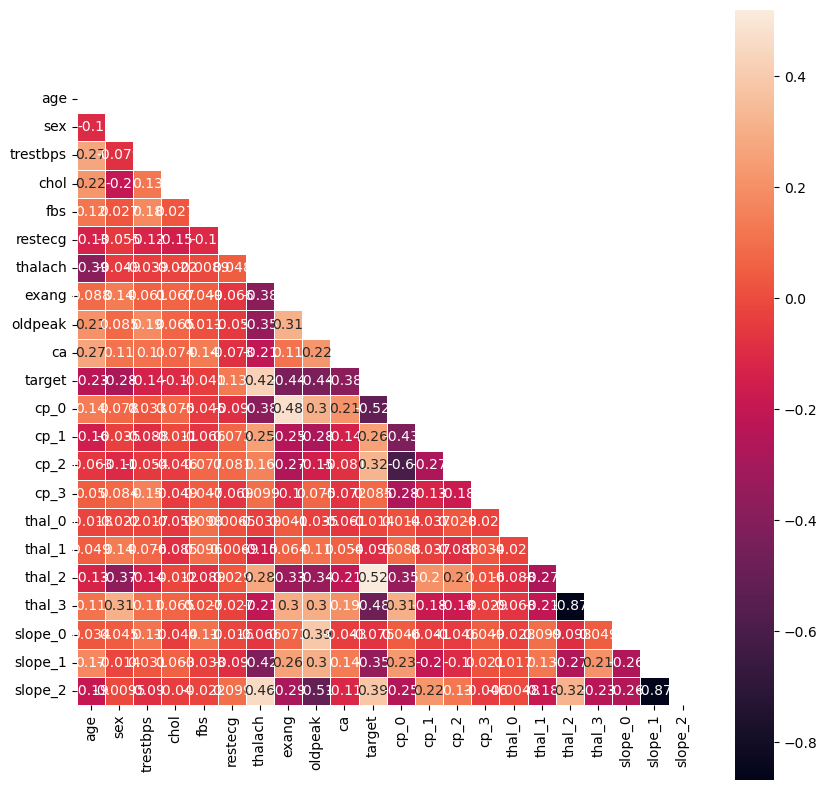

In [25]:
correlation_matrix=df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

Сильная корреляция, >0,7 отсутствует, ее можно увидеть только у бинарных переменных, которые были добавлены для описания одного признака

In [ ]:
y=df['target']
X=df.drop(columns=['target'])


In [32]:
f_statistic, p_value = f_classif(X, y)
list_impt = []

for i in range(len(X.columns)):
    if p_value[i] < 0.05:
        list_impt.append(X.columns[i])
        print(f"Признак {X.columns[i]} значим")
    else:
        print(f"Признак {X.columns[i]} не значим")

Признак age значим
Признак sex значим
Признак trestbps значим
Признак chol значим
Признак fbs не значим
Признак restecg значим
Признак thalach значим
Признак exang значим
Признак oldpeak значим
Признак ca значим
Признак cp_0 значим
Признак cp_1 значим
Признак cp_2 значим
Признак cp_3 значим
Признак thal_0 не значим
Признак thal_1 значим
Признак thal_2 значим
Признак thal_3 значим
Признак slope_0 значим
Признак slope_1 значим
Признак slope_2 значим


In [ ]:
df1=df[list_impt+['target']]
df1


age  sex  trestbps  chol  restecg  thalach  exang  oldpeak  ca   cp_0  \
0      52    1       125   212        1      168      0      1.0   2   True   
1      53    1       140   203        0      155      1      3.1   0   True   
2      70    1       145   174        1      125      1      2.6   0   True   
3      61    1       148   203        1      161      0      0.0   1   True   
4      62    0       138   294        1      106      0      1.9   3   True   
...   ...  ...       ...   ...      ...      ...    ...      ...  ..    ...   
1020   59    1       140   221        1      164      1      0.0   0  False   
1021   60    1       125   258        0      141      1      2.8   1   True   
1022   47    1       110   275        0      118      1      1.0   1   True   
1023   50    0       110   254        0      159      0      0.0   0   True   
1024   54    1       120   188        1      113      0      1.4   1   True   

       cp_1   cp_2   cp_3  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  \
0     False  False  False   False   False    True    False    False     True   
1     False  False  False   False   False    True     True    False    False   
2     False  False  False   False   False    True     True    False    False   
3     False  False  False   False   False    True    False    False     True   
4     False  False  False   False    True   False    False     True    False   
...     ...    ...    ...     ...     ...     ...      ...      ...      ...   
1020   True  False  False   False    True   False    False    False     True   
1021  False  False  False   False   False    True    False     True    False   
1022  False  False  False   False    True   False    False     True    False   
1023  False  False  False   False    True   False    False    False     True   
1024  False  False  False   False   False    True    False     True    False   

      target  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
1020       1  
1021       0  
1022       0  
1023       1  
1024       0  

[1025 rows x 20 columns]

In [50]:
# Обучение структуры БСД
estimator = HillClimbSearch(df1)
model_e = estimator.estimate(scoring_method=BicScore(df1))

  0%|          | 0/1000000 [00:00<?, ?it/s]

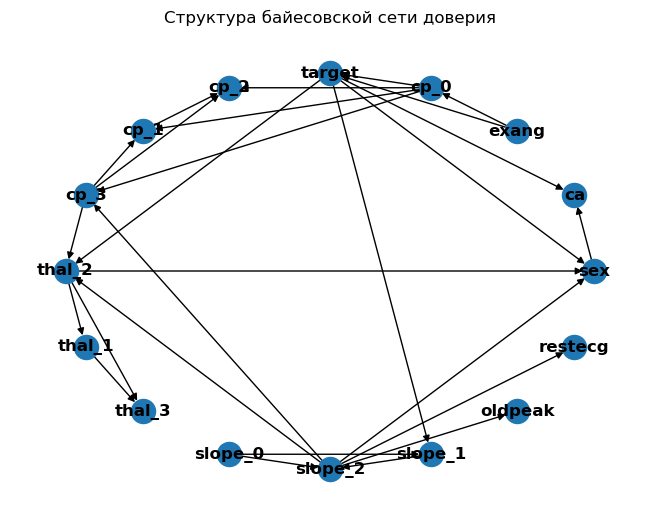

In [ ]:
#построение модели
model = BayesianNetwork(model_e .edges())
pos = nx.circular_layout(model)  
nx.draw(model, pos, with_labels=True, font_weight='bold', arrows=True)
plt.title('Структура байесовской сети доверия')
plt.show()

In [73]:
model.fit(df1)
#получение распределения вероятностей целевого прзнака
inf = VariableElimination(model)
inf_result = inf.query(variables=['target'], evidence={'sex': 1.0,  'restecg': 0.0, 'exang': 0.0, 'oldpeak': 0.0, 'ca': 0.0})
print(inf_result)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1467 |
+-----------+---------------+
| target(1) |        0.8533 |
+-----------+---------------+


In [72]:
#попробуем тоже самое для другого пола
inf = VariableElimination(model)
inf_result = inf.query(variables=['target'], evidence={'sex': 0.0,  'restecg': 0.0, 'exang': 0.0, 'oldpeak': 0.0, 'ca': 0.0})
print(inf_result)

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0369 |
+-----------+---------------+
| target(1) |        0.9631 |
+-----------+---------------+


In [75]:
#функция для предсказания
def prediction(sample, model):
    inf = VariableElimination(model)
    result_l = list()
    discret_r = lambda x: 0 if x.values[0] > x.values[1] else 1

    factor_sample = sample.drop(['target', "age", "trestbps", "chol", "thalach"], axis=1)
    factor_columns = list(factor_sample.columns)
    factor_index = factor_sample.index

    for i in range(factor_sample.shape[0]):
        factor_dict = dict(zip(factor_columns, list(factor_sample[:].loc[factor_index[i]])))
        query_result = inf.query(variables=['target'], evidence=factor_dict)

        result_l.append(discret_r(query_result))

    return np.array(result_l)
prediction_list = prediction(df1, model)
prediction_list

array([0, 0, 0, ..., 0, 1, 0])

In [77]:
true=np.array(df1['target'])
true

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# метрики для оценки модели
accuracy = round(accuracy_score(prediction_list, true), 2)
recall = round(recall_score(prediction_list, true), 2)
precision = round(precision_score(prediction_list, true), 2)
f1 = round(f1_score(prediction_list, true), 2)
roc = round(roc_auc_score(prediction_list, true), 2)
print(f"accuracy: {accuracy}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")
print(f"roc: {roc}")

accuracy: 0.86
recall: 0.85
precision: 0.88
f1: 0.86
roc: 0.86
